# Predicting Movie Success..!

## 1. Introduction: 

Our client, a major film studio, aims to enhance their understanding of factors influencing movie success and improve prediction models for IMDB ratings. They want to leverage advanced data analysis techniques and machine learning to analyze movie characteristics and predict whether a movie will be a hit, average, or flop based on IMDB scores.

### 1.1 Data-Description

The dataset contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

## 2.	Data Exploration: 

Conduct comprehensive EDA using visualization techniques to understand feature distributions and relationships with IMDB scores.

### 2.1 Import necessary Libraries

In [505]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

- Readings from the dataset

In [506]:
data = pd.read_csv('D:\Predicting-Movie-Success\Dataset\movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### 2.2 Categorizing the target varible
Here we are categorizing the target variable in such a way that IMDB score between 1 and 3 is FLOP , between 3 and 6 is AVG, between 6 and 10 is HIT.

And we are using binning in pandas to acheive this.

In [507]:
#Categorising the target varible 
bins = [ 1, 3, 6, 10]
labels = ['FLOP', 'AVG', 'HIT']
data['imdb_success'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)

- ### Barplot of imbd_success column

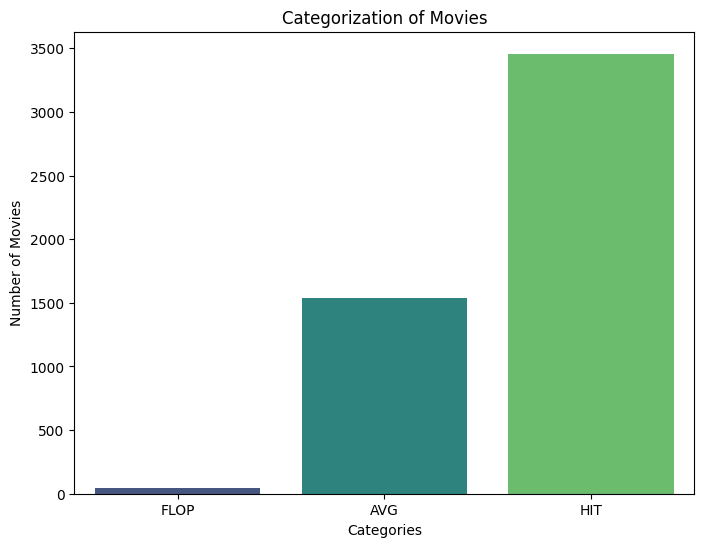

In [508]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='imdb_success', palette='viridis')  # Customize the palette as needed
plt.xlabel('Categories', fontsize=10)
plt.ylabel('Number of Movies', fontsize=10)
plt.title('Categorization of Movies', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [509]:
#Checking the new column
data.head(5)
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'imdb_success'],
      dtype='object')

### Our dataset contains 5043 samples(rows) and 28 variables(columns)

In [510]:
#Shape of the dataset
data.shape

(5043, 29)

### 2.3 Handling the Missing values

Every datset have some missing values, lets find out in which cloumns they are?

In [511]:
#Total null values present in each column
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
imdb_success                   0
dtype: int64

Dropping all the samples that having missing values

In [512]:
#Droping the samples that have missing values
data.dropna(inplace=True)

In [513]:
#Final shape of the data after Droping missing values
data.shape

(3755, 29)

In [514]:
#List of variables in the datset
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'imdb_success'],
      dtype='object')

Lets find out how the string variables are behaving

In [515]:
#Describing the categorical data
data.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755
unique,2,1658,2187,745,1427,3654,2586,3655,3655,33,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Pan,Steve Coogan,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,English,USA,R
freq,3631,25,20,147,42,3,8,3,3,3598,2986,1700


'movie_title','movie_imdb_link' columns are almost unique,so they doesn't contribute in predicting target variable

In [516]:
data.drop(columns=['movie_title','movie_imdb_link'],inplace=True)

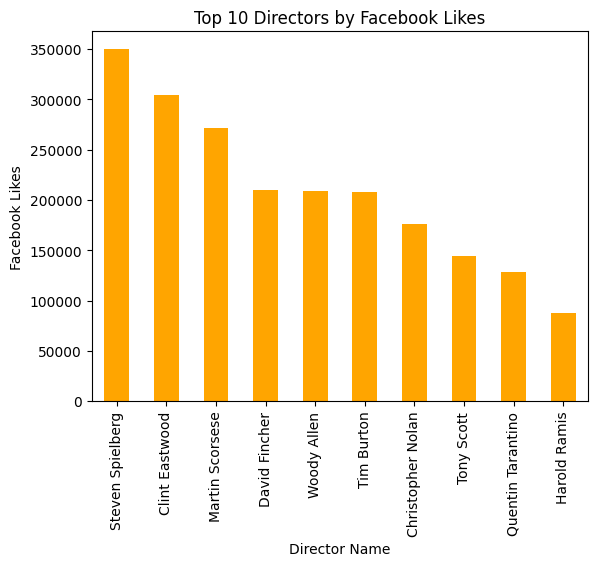

In [517]:
top_directors = data.groupby('director_name')['director_facebook_likes'].sum().sort_values(ascending=False).head(10)
top_directors.plot(kind='bar', color='orange')
plt.title('Top 10 Directors by Facebook Likes')
plt.xlabel('Director Name')
plt.ylabel('Facebook Likes')
plt.show()


### Genre Popularity
Bar Plot: Count of movies per genre:

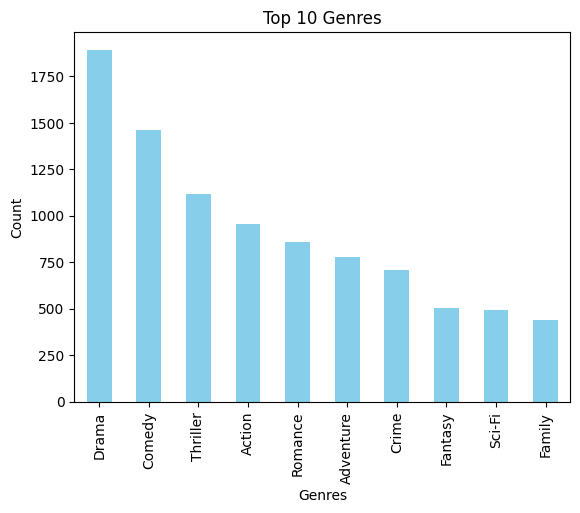

In [518]:
genre_counts = data['genres'].str.split('|').explode().value_counts().head(10)
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()


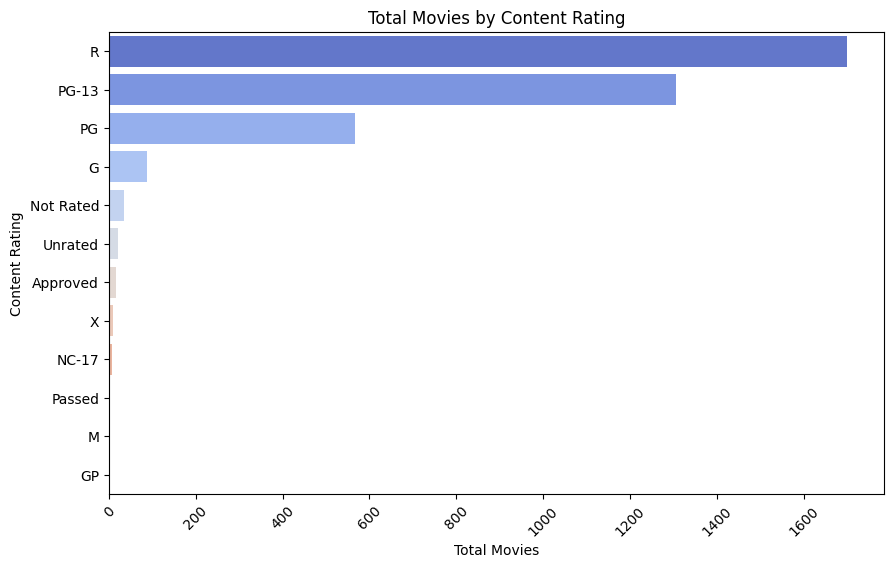

In [519]:
content_rating_count = data['content_rating'].value_counts()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=content_rating_count.index, x=content_rating_count.values, palette='coolwarm')
plt.title('Total Movies by Content Rating')
plt.ylabel('Content Rating')
plt.xlabel('Total Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

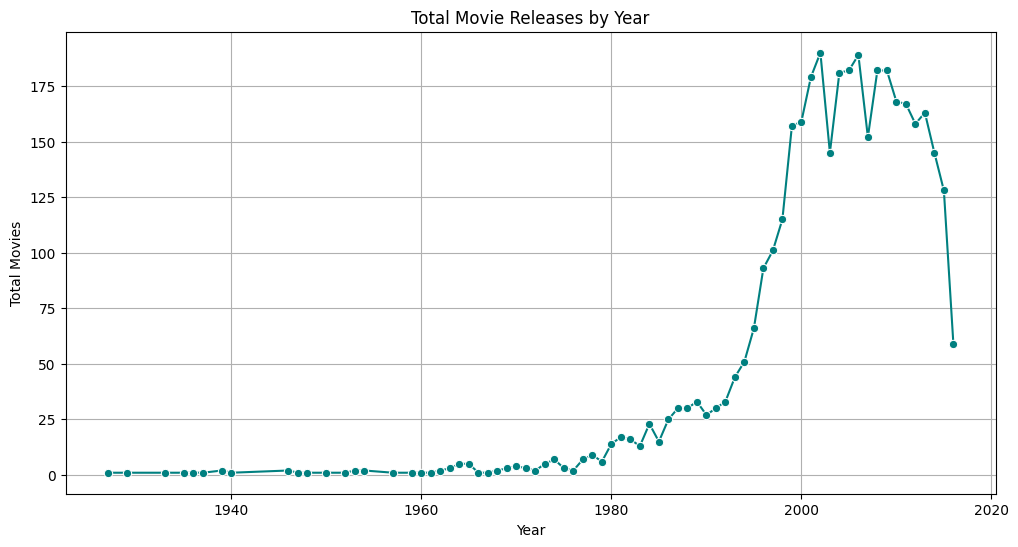

In [520]:
movies_per_year = data['title_year'].value_counts().sort_index()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o', color='teal')
plt.title('Total Movie Releases by Year')
plt.xlabel('Year')
plt.ylabel('Total Movies')
plt.grid(True)
plt.show()

In [521]:
# Count total movies by country
movies_by_country = data['country'].value_counts().reset_index()
movies_by_country.columns = ['country', 'total_movies']

# World Map Visualization
fig = px.choropleth(movies_by_country, 
                    locations='country', 
                    locationmode='country names', 
                    color='total_movies',
                    title='Total Movies by Country',
                    color_continuous_scale='Viridis')
fig.show()

### 2.4 Label Encoding

All the categorical columns and the columns with text data are being Label Encodeded in this step.

In [522]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [523]:
#A sample of data after label encoding
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_success
0,1,620,723.0,178.0,0.0,855.0,1001,1000.0,760505847.0,91,...,9,43,7,237000000.0,66,936.0,7.9,7,33000,HIT
1,1,538,302.0,169.0,563.0,1000.0,1591,40000.0,309404152.0,85,...,9,43,7,300000000.0,64,5000.0,7.1,12,0,HIT
2,1,1394,602.0,148.0,0.0,161.0,1794,11000.0,200074175.0,107,...,9,42,7,245000000.0,72,393.0,6.8,12,85000,HIT
3,1,251,813.0,164.0,22000.0,23000.0,380,27000.0,448130642.0,243,...,9,43,7,250000000.0,69,23000.0,8.5,12,164000,HIT
5,1,62,462.0,132.0,475.0,530.0,1836,640.0,73058679.0,105,...,9,43,7,263700000.0,69,632.0,6.6,12,24000,HIT


In [524]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'imdb_success'],
      dtype='object')

### 2.5 Correlation

To find out whether there is any relation between variables, in other terms multicollineariaty.

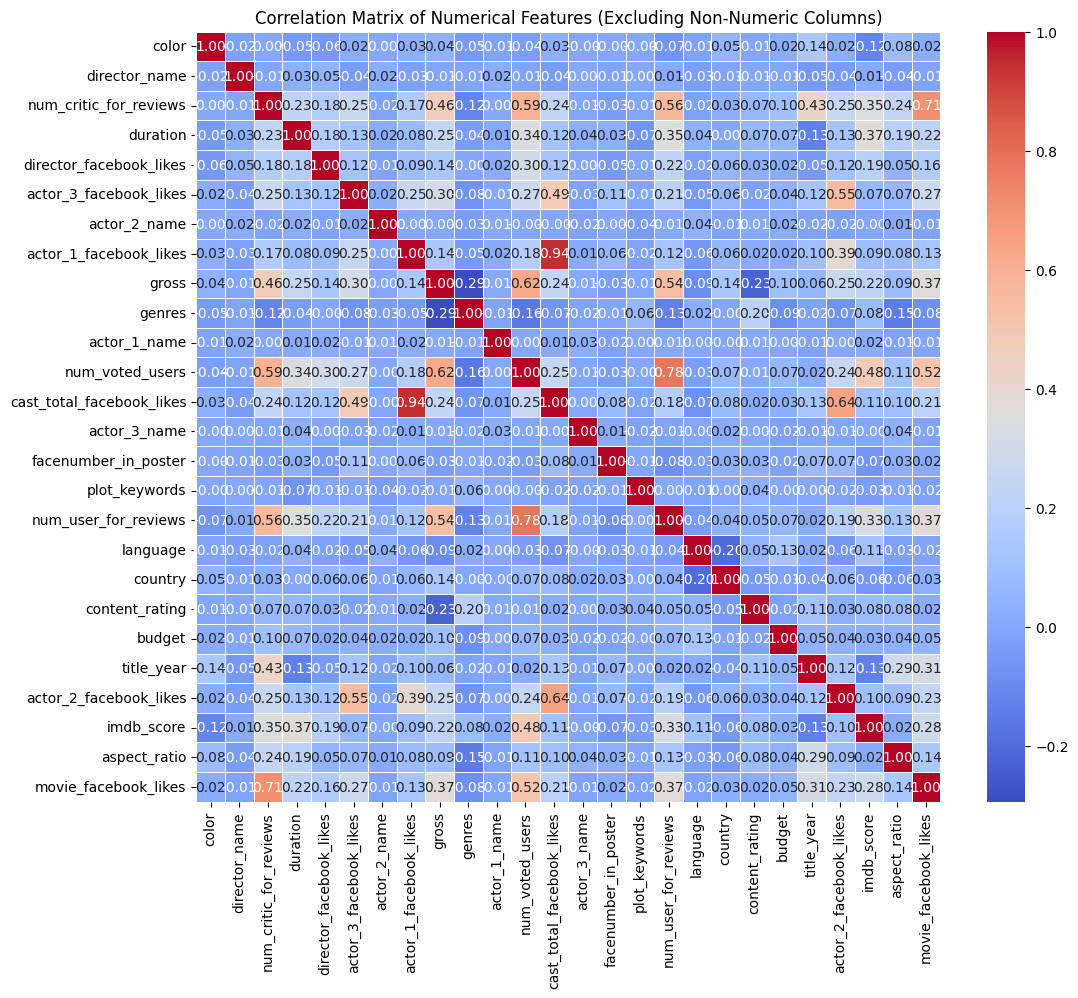

In [525]:
#Finding Correlation between variables
numeric_data = data.select_dtypes(include=[np.number])

# Recalculate the correlation matrix for numeric columns
correlation_matrix_numeric = numeric_data.corr()
mask = np.zeros(correlation_matrix_numeric.shape, dtype=bool)
# Plot the heatmap again
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_numeric,xticklabels=correlation_matrix_numeric.columns,yticklabels=correlation_matrix_numeric.columns, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,mask=mask)
plt.title("Correlation Matrix of Numerical Features (Excluding Non-Numeric Columns)")
plt.show()

These variables that are correlated cause errors in the prediction, so removing them

In [526]:
#Removing few columns due to multicollinearity
data.drop(columns=['director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_3_name','actor_2_facebook_likes','aspect_ratio','actor_1_facebook_likes','facenumber_in_poster','plot_keywords'],inplace=True)
data.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews','color','language'],inplace=True)
data.drop(columns=['country','content_rating'],inplace=True)

In [551]:
data.head()

,director_name,duration,gross,genres,actor_1_name,num_voted_users,num_user_for_reviews,budget,title_year,movie_facebook_likes
0,620,178.0,760505847.0,91,189,886204,3054.0,237000000.0,66,33000
1,538,169.0,309404152.0,85,686,471220,1238.0,300000000.0,64,0
2,1394,148.0,200074175.0,107,258,275868,994.0,245000000.0,72,85000
3,251,164.0,448130642.0,243,1339,1144337,2701.0,250000000.0,69,164000
5,62,132.0,73058679.0,105,322,212204,738.0,263700000.0,69,24000


Removing the column "imdb_score" since we have "imdb_binned

I am gonna train the model with imdb_binned not with imdb_score so dropping the column

In [527]:
#Removing the column "imdb_score" since we have "imdb_binned"
data.drop(columns=['imdb_score'],inplace=True)

In [528]:
data.shape

(3755, 11)

# 3. CLASSIFICATION MODEL BUILDING

Splitting the data into X and y where X contains Indepentent variables and y contain Target/Dependent variable

In [529]:
data.columns

Index(['director_name', 'duration', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'num_user_for_reviews', 'budget', 'title_year',
       'movie_facebook_likes', 'imdb_success'],
      dtype='object')

In [530]:
#Independent Variables
X = data[['duration', 'budget', 'gross', 'num_voted_users', 'num_user_for_reviews', 
              'title_year', 'genres', 'director_name', 'actor_1_name']]
#Dependent/Target Variable
y = data['imdb_success']    
X,y

(      duration       budget        gross  num_voted_users  \
 0        178.0  237000000.0  760505847.0           886204   
 1        169.0  300000000.0  309404152.0           471220   
 2        148.0  245000000.0  200074175.0           275868   
 3        164.0  250000000.0  448130642.0          1144337   
 5        132.0  263700000.0   73058679.0           212204   
 ...        ...          ...          ...              ...   
 5026     110.0       4500.0     136007.0             3924   
 5027      90.0      10000.0     673780.0             4555   
 5033      77.0       7000.0     424760.0            72639   
 5035      81.0       7000.0    2040920.0            52055   
 5042      90.0       1100.0      85222.0             4285   
 
       num_user_for_reviews  title_year  genres  director_name  actor_1_name  
 0                   3054.0          66      91            620           189  
 1                   1238.0          64      85            538           686  
 2               

### 3.1 Train Test Split

We need data not only to train our model but also to test our model. So splitting the dataset into 70:30 (Train:Test) ratio.We have a predefined a function in Sklearn library called test_train_split, lets use that.

In [531]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)

(3004, 9)
(3004,)


### 3.2 Scaling
Few variables will be in the range of Millions and some in Tens, lets bring all of them into same scale

In [532]:
#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [533]:
data.head()

,director_name,duration,gross,genres,actor_1_name,num_voted_users,num_user_for_reviews,budget,title_year,movie_facebook_likes,imdb_success
0,620,178.0,760505847.0,91,189,886204,3054.0,237000000.0,66,33000,HIT
1,538,169.0,309404152.0,85,686,471220,1238.0,300000000.0,64,0,HIT
2,1394,148.0,200074175.0,107,258,275868,994.0,245000000.0,72,85000,HIT
3,251,164.0,448130642.0,243,1339,1144337,2701.0,250000000.0,69,164000,HIT
5,62,132.0,73058679.0,105,322,212204,738.0,263700000.0,69,24000,HIT


### 3.4 Feature Selection using RFECV¶

Finding optimal features to use for Machine learning model training can sometimes be a difficult task to accomplish.There are just so many methods to choose from and here I am going with RFECV.

Recursive Feature Elimination with Cross Validation

Recursive — involving doing or saying the same thing several times in order to produce a particular result or effect

Feature — individual measurable property or characteristic of a phenomenon being observed — an attribute in your dataset

Cross-Validation — a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

In [534]:
#Performing Recursive Feauture Elimation with Cross Validation
#Using Random forest for RFE-CV and logloss as scoring
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
clf_rf=RandomForestClassifier(random_state=0)
rfecv=RFECV(estimator=clf_rf, step=1,cv=5,scoring='neg_log_loss')
rfecv=rfecv.fit(X_train,y_train)

In [535]:
#Optimal number of features
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 8
Best features : Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


In [536]:
#Feauture Ranking
clf_rf = clf_rf.fit(X_train,y_train)
importances = clf_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [537]:
#Selecting the Important Features
X_opt = X_train.iloc[:,X_train.columns[rfecv.support_]]
X_test = X_test.iloc[:,X_test.columns[rfecv.support_]]

In [ ]:
#Creating anew dataframe with column names and feature importance
dset = pd.DataFrame()
data1 = data
data1.drop(columns=['imdb_success'],inplace=True)
dset['attr'] = data1.columns

dset['importance'] = clf_rf.feature_importances_
#Sorting with importance column
dset = dset.sort_values(by='importance', ascending=True)

#Barplot indicating Feature Importance
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

# 3.4 Random Forest

Random forests is an ensemble learning method for classification that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees

n_estimators is a parameter that specify number of trees in the forest.

criterion is to specify what function to measure the quality of a split. “entropy” is for the information gain.

In [541]:
#Training the Random Forest Classifer on Train data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

Predicting the test data

In [542]:
print(X_train.shape)  # Check number of features in training data
print(X_test.shape)   # Check number of features in test data


(3004, 9)
(751, 8)


In [543]:
print(X_train.columns)  # Columns in training data
print(X_test.columns)   # Columns in test data


RangeIndex(start=0, stop=9, step=1)
Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


In [549]:
#Predicting the target variable
y_pred = classifier.predict(X_test)

### 3.5 Confusion Matrix

Confusion matrix gives a clear view of ground truth and prediction.

In [545]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[143,   0,  83],
       [  4,   0,   1],
       [ 40,   0, 480]])

### 3.6 Classification Report

In [546]:
#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         AVG       0.76      0.63      0.69       226
        FLOP       0.00      0.00      0.00         5
         HIT       0.85      0.92      0.89       520

    accuracy                           0.83       751
   macro avg       0.54      0.52      0.53       751
weighted avg       0.82      0.83      0.82       751



In [547]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(RandomForestClassifier(), X, y, cv=10, scoring='accuracy')
print(f"Mean CV Accuracy: {cv_scores.mean()}")

Mean CV Accuracy: 0.7882673758865248


### Data Augmentation with SMOTE:

In [548]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

# Train the model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_res, Y_train_res)

# Predict and evaluate
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

         AVG       0.65      0.75      0.70       226
        FLOP       0.00      0.00      0.00         5
         HIT       0.88      0.82      0.85       520

    accuracy                           0.80       751
   macro avg       0.51      0.52      0.52       751
weighted avg       0.81      0.80      0.80       751



# Saving the results into Model Using Joblib File

In [550]:
import joblib

# Save the model to a file
model_filename = 'random_forest_model.joblib'
joblib.dump(classifier, model_filename)

print(f'Model saved to {model_filename}')


Model saved to random_forest_model.joblib
